In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import sympy 

In [2]:
sympy.init_printing(use_unicode = True)

# Capítulo 1

## Exercício 1

Após fazer uma seleção prévia das ações negociadas em bolsa de acordo com a liquidez e o setor de atuação da empresa entre outras análises fundamentalistas, um investidor montou um universo de ativos, cujas séries históricas de preços e retornos encontram-se na pasta Dados. Esse investidor busca obter um certo retorno e para atingir seu objetivo está disposto a correr um certo risco. Pede-se:

a) Calcular os retornos e os riscos individuais desses ativos, usando para isso janelas de 200 e 300 dias.

b) Classiﬁcar esses ativos de acordo com os seus retornos e riscos e analisar quais ativos seriam menos ou mais indicados para o investimento, uma vez que o investidor busca os maiores retornos com aversão ao risco.

c) Quão importantes são os retornos e os riscos individuais das ações na montagem de uma carteira de investimentos? Que outros fatores são importantes?

## Resolução

### A) Importando a série de dados

In [3]:
dados = pd.read_excel("Exercícios.xls", sheet_name = "Dados")

Retirando os retornos já calculados, farei novamente no pandas.

In [4]:
dados = dados.drop(['Unnamed: 12', 'Retornos', 'ibov.1',
       'petr4.1', 'tnlp4.1', 'bbdc4.1', 'elet6.1', 'tspp4.1', 'ebtp4.1',
       'vale5.1', 'itau4.1', 'cmig4.1', 'plim4.1'], axis = 1)

In [5]:
dados

,Preços,ibov,petr4,tnlp4,bbdc4,elet6,tspp4,ebtp4,vale5,itau4,cmig4,plim4
0,2002-03-28,13243,58.30,29.60,14.05,34.70,5.79,7.50,61.40,184.50,34.40,0.51
1,2002-03-27,13424,58.10,29.93,14.06,35.60,5.86,7.50,61.60,188.50,35.45,0.51
2,2002-03-26,13569,57.41,30.59,14.40,36.15,6.03,7.82,61.50,186.51,35.37,0.53
3,2002-03-25,13277,56.70,29.71,13.85,34.70,6.11,7.67,60.24,185.00,34.04,0.53
4,2002-03-22,13312,58.40,30.50,14.20,34.35,5.95,7.70,59.80,185.70,34.01,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...
402,2000-08-07,16995,44.39,44.87,12.24,36.71,26.27,40.36,45.49,166.84,32.36,2.85
403,2000-08-04,16761,42.96,44.63,12.05,36.80,26.07,39.97,44.73,164.91,32.46,2.80
404,2000-08-03,16720,43.55,43.85,11.93,37.81,26.36,39.38,43.02,164.86,32.95,2.75
405,2000-08-02,16314,43.25,42.42,11.33,36.44,26.56,38.40,41.40,160.06,31.58,2.71


In [6]:
def retorno(dados):
    
    header = dados.columns
    
    df = pd.DataFrame(columns = header[2:], index = np.array(dados["Preços"][0:406]))
    
    for i in range(2, len(header)):
        acao = header[i]
        retorno = []

        for j in range(0, 406):
            retorno.append(((dados[acao][j]-dados[acao][j+1])/dados[acao][j+1]))
        
    
        df[acao] = retorno
        
    return df

In [7]:
retorno(dados) 

,petr4,tnlp4,bbdc4,elet6,tspp4,ebtp4,vale5,itau4,cmig4,plim4
2002-03-28,0.003442,-0.011026,-0.000711,-0.025281,-0.011945,0.000000,-0.003247,-0.021220,-0.029619,0.000000
2002-03-27,0.012019,-0.021576,-0.023611,-0.015214,-0.028192,-0.040921,0.001626,0.010670,0.002262,-0.037736
2002-03-26,0.012522,0.029620,0.039711,0.041787,-0.013093,0.019557,0.020916,0.008162,0.039072,0.000000
2002-03-25,-0.029110,-0.025902,-0.024648,0.010189,0.026891,-0.003896,0.007358,-0.003770,0.000882,0.060000
2002-03-22,-0.006803,-0.028972,-0.020690,-0.066322,0.000000,-0.065534,-0.026059,0.003784,-0.047339,-0.019608
...,...,...,...,...,...,...,...,...,...,...
2000-08-08,-0.036495,-0.010698,-0.004085,-0.009807,-0.022459,-0.021804,-0.009233,-0.011628,-0.012052,0.035088
2000-08-07,0.033287,0.005378,0.015768,-0.002446,0.007672,0.009757,0.016991,0.011703,-0.003081,0.017857
2000-08-04,-0.013548,0.017788,0.010059,-0.026713,-0.011002,0.014982,0.039749,0.000303,-0.014871,0.018182
2000-08-03,0.006936,0.033711,0.052957,0.037596,-0.007530,0.025521,0.039130,0.029989,0.043382,0.014760


### Dataframe com Risco e Retorno 

In [8]:
def Risco_Retorno1(janela, retornos):
    df= pd.DataFrame(index = ["Retorno Esperado", "Risco"], )
    
    for acao in retornos.columns:
        retorno_risco =[str(round(retornos[acao][0: janela+1].mean()*100,2))+"%", 
                        str(round(retornos[acao][0: janela+1].std()*100,2))+"%"] 
        df[acao] = retorno_risco
    
    return df

### 200 dias:

In [9]:
Risco_Retorno1(200, retorno(dados))

,petr4,tnlp4,bbdc4,elet6,tspp4,ebtp4,vale5,itau4,cmig4,plim4
Retorno Esperado,0.02%,-0.07%,0.13%,0.26%,-0.44%,-0.4%,0.1%,0.02%,0.25%,-0.13%
Risco,2.11%,2.85%,2.41%,3.42%,3.84%,4.1%,1.84%,2.28%,2.93%,4.69%


### 300 dias:

In [10]:
Risco_Retorno1(300, retorno(dados))

,petr4,tnlp4,bbdc4,elet6,tspp4,ebtp4,vale5,itau4,cmig4,plim4
Retorno Esperado,0.1%,-0.1%,0.05%,0.09%,-0.38%,-0.41%,0.13%,0.03%,0.08%,-0.41%
Risco,2.12%,2.83%,2.56%,3.4%,3.78%,3.94%,1.92%,2.43%,2.82%,4.42%


#### b) 

A ação com maior retorno em uma janela de $200$ é a ELT6, enquanto na janela de $300$ é a 
VALE5. No ponto de vista de risco, a ELT6 é mais arriscada que a VALE5, devendo ser considerada o investimento nessa.

Já a com pior desempenho, temos a TSPP4 na janela de $200$ e a EBTP4 e PLIM4 empatadas na janela de $400$, ambas com altíssimo risco. 

#### c) 
São fatores que ajudam a analisar o fator individual de cada uma das parcelas da carteira
de investimento. A covariância também é um fator importante.

# Exercício 2

Um investidor possui 100.000,00 para aplicar em ações. Dada a análise individual do exercício anterior, esse investidor decidiu montar uma carteira de investimento. Ele resolveu comprar 40.000,00 de ações Vale PNA e 30.000,00 de Eletrobrás PNB, por considerar papéis atrativos. Analogamente, ele quer evitar Telesp Celular PN, Globo Cabo PN e Embratel PN. Assumindo que o investidor vai alocar todo o saldo do investimento em um único ativo, pede-se, único ativo (no livro falam de pelo menos 3):

a) Qual ação do universo considerado ele deve comprar para manter o nível de risco diário da carteira abaixo de 1,8%, considerando uma janela de 400 dias?

b) Supondo que o investidor monte a carteira indicada no item anterior, qual o retorno esperado para 1 ano? Sob o ponto de vista única e exclusivamente do retorno e para uma taxa de juros de 18,5% ao ano, vale a pena montar a carteira indicada?

## Resolução

### a)

Temos que: $\sigma^2 = \omega'\Sigma\omega$

Ainda, $\Sigma = E((R-r)(R-r)')$

Calcularemos, então a matriz de covariância:

In [11]:
def cov_janela(retornos, janela):
    retorno_janela = retornos.iloc[0:janela]
    
    return np.cov(retorno_janela.T)

matriz_cov = cov_janela(retorno(dados), 406)

A função acima nos devolve um array da matriz de covariancia. Abaixo, mostro ela de forma mais bonita, usando um dataframe.

In [12]:
pd.DataFrame(matriz_cov, columns = dados.columns[2:], 
             index = dados.columns[2:])

,petr4,tnlp4,bbdc4,elet6,tspp4,ebtp4,vale5,itau4,cmig4,plim4
petr4,0.000469,0.000258,0.000163,0.000205,0.000213,0.000234,0.000141,0.000183,0.000210,0.000229
tnlp4,0.000258,0.000742,0.000395,0.000487,0.000573,0.000678,0.000208,0.000334,0.000466,0.000597
bbdc4,0.000163,0.000395,0.000669,0.000398,0.000363,0.000480,0.000147,0.000366,0.000349,0.000402
elet6,0.000205,0.000487,0.000398,0.001049,0.000448,0.000564,0.000228,0.000349,0.000555,0.000622
tspp4,0.000213,0.000573,0.000363,0.000448,0.001424,0.000754,0.000227,0.000296,0.000394,0.000630
ebtp4,0.000234,0.000678,0.000480,0.000564,0.000754,0.001488,0.000276,0.000360,0.000528,0.000711
vale5,0.000141,0.000208,0.000147,0.000228,0.000227,0.000276,0.000400,0.000142,0.000223,0.000240
itau4,0.000183,0.000334,0.000366,0.000349,0.000296,0.000360,0.000142,0.000583,0.000322,0.000372
cmig4,0.000210,0.000466,0.000349,0.000555,0.000394,0.000528,0.000223,0.000322,0.000779,0.000545
plim4,0.000229,0.000597,0.000402,0.000622,0.000630,0.000711,0.000240,0.000372,0.000545,0.001747


Agora, vamos variar o vetor w até obter um risco $\sigma \leq 1,8\%$.

In [13]:
w_t = [0.3, 0, 0, 0.3, 0, 0, 0.4, 0, 0, 0] #vetor w transposto 

#30% de petr4
#30% de elet6
#30% de itau4

In [14]:
w = np.array([w_t]).T # (wˆT)ˆT = w

In [15]:
def risco(matriz_cov, w):
    a = np.matmul(matriz_cov, w)
    
    return np.sqrt(float(np.matmul(w.T, a)))

In [16]:
risco(matriz_cov, w)

Com essa combinação temos o risco menor que $1,8\%$.

### b) 

Temos que o retorno é dado por:

$\mu = \omega'r$

Modificando um pouco a função já criada no exercício 1, temos:

In [17]:
def Risco_Retorno2(janela, retornos):
    df= pd.DataFrame(index = ["Retorno Esperado", "Risco"], )
    
    for acao in retornos.columns:
        retorno_risco =[retornos[acao][0: janela+1].mean(), 
                        retornos[acao][0: janela+1].std()]
        df[acao] = retorno_risco
    
    return df

In [18]:
r = np.array(Risco_Retorno2(406, retorno(dados)).iloc[0])

In [19]:
np.matmul(w_t, r)

Logo, o retorno será de $\approx 0.09\% $ ao dia.

Ao longo de um ano: 
$p = (1+\mu)^{252}-1$

In [20]:
p = (1 + np.matmul(w_t, r))**252 - 1 #252 dias úteis

In [21]:
p

Assim, o retorno esperado é de aproximadamente $25\%$. Para saber se compensa ou não, cabe ao investidor saber se o vale a pena correr mais riscos por $6,5\%$ de rentabilidade.

# Exercício 3

Um investidor possui hoje 100% do seus investimentos em renda ﬁxa a uma taxa de 18,5% ao ano e tem a oportunidade de alocar parte desses recursos em renda variável dentro do universo de ativos, cujas séries históricas de preços e retornos se encontram na pasta Dados. Para uma janela de 200, pede-se:

a) Quais ativos de risco ele pode trazer para a carteira de maneira a melhorar o seu retorno?

b) Qual seria o risco e o retorno da sua carteira se ele mantivesse 30% em renda ﬁxa e distribuísse o restante igualmente nos outros ativos?

c) Qual percentual ele deve manter em renda ﬁxa se quer correr um risco máximo de 0,50%, e Vale PNA é a sua única opção de investimento em ativos de risco?

## Resolução

### a)

Adicionando uma nova coluna correspondente aos dados da renda fixa.

In [22]:
R_dados = retorno(dados)
R_dados["Renda Fixa"] = np.array([0.0007]*406)
R_j200 = Risco_Retorno2(200, R_dados)
Risco_Retorno1(200, R_dados)

,petr4,tnlp4,bbdc4,elet6,tspp4,ebtp4,vale5,itau4,cmig4,plim4,Renda Fixa
Retorno Esperado,0.02%,-0.07%,0.13%,0.26%,-0.44%,-0.4%,0.1%,0.02%,0.25%,-0.13%,0.07%
Risco,2.11%,2.85%,2.41%,3.42%,3.84%,4.1%,1.84%,2.28%,2.93%,4.69%,0.0%


Como estamos avaliando retornos ao dia, os investimentos em renda fixa tem um retorno ao dia de: 
 
 $(1+18\%)^{\frac{1}{252}} - 1 = i_{dia}\Rightarrow i_{dia} = 0.07\%$ 
 
Ou seja, devemos encontrar investimentos com retorno $r_{dia}\geq0.07\%$.

Da tabela, os investimentos são: bbdc4, elet6, vale5, cmig4.

### b)

In [23]:
w1_t = [0, 0, 0.175, 0.175, 0, 0, 0.175, 0, 0.175, 0, 0.3]
w1 = np.array([w1_t]).T

Calculando o retorno:

In [24]:
retorno = np.matmul(w1_t,R_j200.iloc[0])
retorno

Matriz de Covariância:

In [25]:
matriz_cov1 = cov_janela(R_dados, 200)

matriz_cov1 = matriz_cov1.round(5)

matriz_cov1 = np.where(matriz_cov1 <= 0, 0, matriz_cov1)

pd.DataFrame(matriz_cov1, columns = R_dados.columns, 
             index = R_dados.columns)

,petr4,tnlp4,bbdc4,elet6,tspp4,ebtp4,vale5,itau4,cmig4,plim4,Renda Fixa
petr4,0.00045,0.00021,0.00015,0.00020,0.00015,0.00020,0.00011,0.00019,0.00015,0.00021,0.0
tnlp4,0.00021,0.00082,0.00040,0.00053,0.00055,0.00078,0.00018,0.00032,0.00049,0.00064,0.0
bbdc4,0.00015,0.00040,0.00058,0.00036,0.00034,0.00056,0.00012,0.00035,0.00033,0.00042,0.0
elet6,0.00020,0.00053,0.00036,0.00118,0.00037,0.00066,0.00023,0.00035,0.00061,0.00064,0.0
tspp4,0.00015,0.00055,0.00034,0.00037,0.00148,0.00071,0.00015,0.00024,0.00029,0.00060,0.0
ebtp4,0.00020,0.00078,0.00056,0.00066,0.00071,0.00168,0.00023,0.00037,0.00054,0.00074,0.0
vale5,0.00011,0.00018,0.00012,0.00023,0.00015,0.00023,0.00034,0.00011,0.00016,0.00016,0.0
itau4,0.00019,0.00032,0.00035,0.00035,0.00024,0.00037,0.00011,0.00052,0.00032,0.00035,0.0
cmig4,0.00015,0.00049,0.00033,0.00061,0.00029,0.00054,0.00016,0.00032,0.00086,0.00051,0.0
plim4,0.00021,0.00064,0.00042,0.00064,0.00060,0.00074,0.00016,0.00035,0.00051,0.00219,0.0


Calculando o risco:

In [26]:
risco1 = risco(matriz_cov1, w1)
risco1

Temos que o risco é de $\approx1,42\%$, e o retorno $\approx 0,15\%$.

Diferente do demonstrado na Resolução do livro.

Considerou o retorno da renda fixa? 

### c)

Definimos o vetor :
\begin{align}
    \omega &= \begin{bmatrix}
           0 \\
           \vdots\\
           \omega_{7}\\
           0\\
           \vdots \\
           0\\
           \omega_{11}\
         \end{bmatrix}
  \end{align}
  
De tal forma que $\omega_{11} = 1 - \omega_7$.

Com isso, queremos que:


$\sigma = \sqrt{\omega'\Sigma\omega} \leq 0,5\%$

Usando uma lib de matemática simbólica:




In [27]:
w = sympy.symbols('omega_7') #define o símbolo de W_7
w2 =sympy.Matrix([0, 0, 0, 0, 0, 0, w, 0, 0, 0, 1-w]) #define o vetor w
cov1 = sympy.Matrix(matriz_cov1) #define a matriz de covariancia 
cov1 

⎡0.00045  0.00021  0.00015  0.0002   0.00015  0.0002   0.00011  0.00019  0.000
⎢                                                                             
⎢0.00021  0.00082  0.0004   0.00053  0.00055  0.00078  0.00018  0.00032  0.000
⎢                                                                             
⎢0.00015  0.0004   0.00058  0.00036  0.00034  0.00056  0.00012  0.00035  0.000
⎢                                                                             
⎢0.0002   0.00053  0.00036  0.00118  0.00037  0.00066  0.00023  0.00035  0.000
⎢                                                                             
⎢0.00015  0.00055  0.00034  0.00037  0.00148  0.00071  0.00015  0.00024  0.000
⎢                                                                             
⎢0.0002   0.00078  0.00056  0.00066  0.00071  0.00168  0.00023  0.00037  0.000
⎢                                                                             
⎢0.00011  0.00018  0.00012  0.00023  0.00015  0.0002

In [28]:
(w2.T*cov1*w2)**(1/2) #Resultado final 

⎡                        0.5⎤
⎢                   ⎛  2⎞   ⎥
⎣0.0184390889145858⋅⎝ω₇ ⎠   ⎦

In [39]:
sympy.solveset(sympy.Eq(0.0184390889145858*w, 0.005), w) #Resolvendo a equacao: w = W_7

Com o isso, chegamos em $\omega_7 \approx 27\% $ e $\omega_{11} \approx 73\%$. Diferente do resultado do Livro. Testando, chega-se que o resultado no livro tem um risco de 0.98% diferente do requisitado, 0.05%. 

In [84]:
w3 = np.array([[0, 0, 0, 0, 0, 0,0.27116307227332 , 0, 0, 0, 1-0.27116307227332]])


In [85]:
a = np.matmul(matriz_cov1, w3.T)
np.sqrt(np.matmul(w3, a))*100

array([[0.5]])

### Resultado do livro 

47% em renda fixa

In [86]:
w4 = np.array([[0, 0, 0, 0, 0, 0, 1-0.47 , 0, 0, 0, 0.47]]) 
np.sqrt(np.matmul(w4, np.matmul(matriz_cov1, w4.T)))*100

array([[0.97727171]])

# Exercício 4

Considere 2 ativos com retornos $R_1$ e $R_2$, fator de correlação $\rho$, e médias e desvios-padrão

$r_1 = 10\%$, $r_2 = 18\%$, $\sigma_1 = 15\%$, $σ_2 = 30\%$.

a) Sendo $\rho = 0,1$, determine o peso $\omega_1$ de modo a mimimizar a variância da carteira com retorno $P = \omega_1R_1 +(1−\omega_1)R_2$ . Qual é o valor da variância mínima $\sigma_{min}^2$ e o retorno esperado $\mu_{min}$?

b) Ainda considerando $\rho = 0,1$, obtenha e trace a equação que relaciona
$\sigma × \mu$ .

c) Para qual valor de $\rho$ obtém-se uma carteira com retorno esperado$\mu = 15\%$ e desvio-padrão $\sigma = 20\%$? Qual é o valor de $\omega_1$ para essa carteira?

## Resolução

### a)

Temos a seguinte matriz de covariância:


\begin{align}
    \Sigma &= \begin{bmatrix} 
           \sigma_1^2 & \rho \sigma_1 \sigma_2\\
           \rho \sigma_1 \sigma_2 & \sigma_2^2
         \end{bmatrix}
  \end{align}
  
Substituindo os valores:
  
  \begin{align}
    \Sigma &= \begin{bmatrix} 
           0.0225 & 0.0045\\
           0.0045  & 0.09
         \end{bmatrix}
  \end{align}

Ainda, $\sigma^2 = \omega' \Sigma \omega$ e:

  \begin{align}
    \omega &= \begin{bmatrix} 
           \omega_1\\
           1-\omega_1
         \end{bmatrix}
  \end{align}

Logo, 
\begin{equation}
\sigma^2 = 0.1035\omega_1^2 - 0.171\omega_1 +0.09
\end{equation}

Basta o lado direito da equação ser mínimo que teremos o $\sigma^2$ mínimo.
Assim, derivando e igualando a zero, temos: 

\begin{equation}
\omega_1 \approx 0.83 \Rightarrow \sigma_{min}^2 = 0.0191 
\end{equation}

Para achar o $\mu_{min}$  
\begin{equation}
   \mu = r \omega \Rightarrow \mu = \omega_10.1+(1-\omega_1)0.18\\
   \mu = 0.18-0.08\omega_1 \Rightarrow \mu_{min} = 0.1
\end{equation}

### b)

\begin{equation}
\mu = \omega_1 0.1+ (1-\omega_1)0.18 \Rightarrow w_1 = \frac{0.18-\mu}{0.08}
\end{equation}

Colocando na equação de cima, 

\begin{equation}
\sigma^2 = 16.2 \mu^2 -3.68\mu+0.23
\end{equation}

E podemos obter o intervalo onde $\mu$ está, já que $-1\leq\omega_1\leq1$:

\begin{equation}
0.1\leq\mu\leq0.26
\end{equation}

Com isso, podemos plotar o gráfico.

In [17]:
mu = sympy.symbols("\mu")
sympy.simplify(0.1035*((0.18-mu)/0.08)**2 - 0.171*((0.18-mu)/0.08)+0.09)

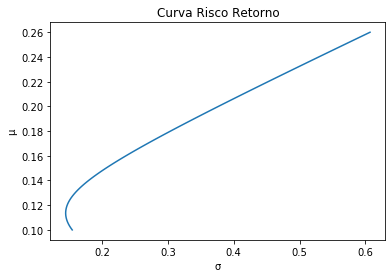

In [22]:
#Primeira 
s1 = lambda mu: np.sqrt(16.2*mu**2-3.68*mu+0.23)
#Segunda
#s2 = lambda mu: -np.sqrt(16.2*mu**2-3.68*mu+0.23)

mu = np.linspace(0.1, 0.26, 100)

plt.plot(s1(mu), mu)
#plt.plot(s2(mu), mu)
plt.xlabel("σ")
plt.ylabel("µ")
plt.title("Curva Risco Retorno")
plt.show()

### c)

Temos que:
\begin{equation}
\sigma^2 = (\sigma_1^2+\sigma_2^2-2\rho\sigma_1\sigma_2)(\frac{\mu-r_2}{r_1-r_2})^2+
2(\sigma_2^2-\rho\sigma_1\sigma_2)(\frac{\mu-r_2}{r_1-r_2}) - \sigma_2^2
\end{equation}
Usando o Sympy:
\begin{equation}
\rho \approx -1 
\end{equation}

\begin{equation}
\omega_1 = 0.375 = 37.5\%
\end{equation}



In [19]:
p = sympy.symbols("\rho")
sympy.solveset(0.2**2 - (0.15**2+0.3**2-2*p*0.15*0.3)*((0.15-0.18)/(0.1-0.18))**2-2*(0.3**2-p*0.15*0.3)*((0.15-0.18)/(0.1-0.18)) + 0.3**2,p)